# Kasus Spike

Melihat Spike Pada Kasus Sederhana

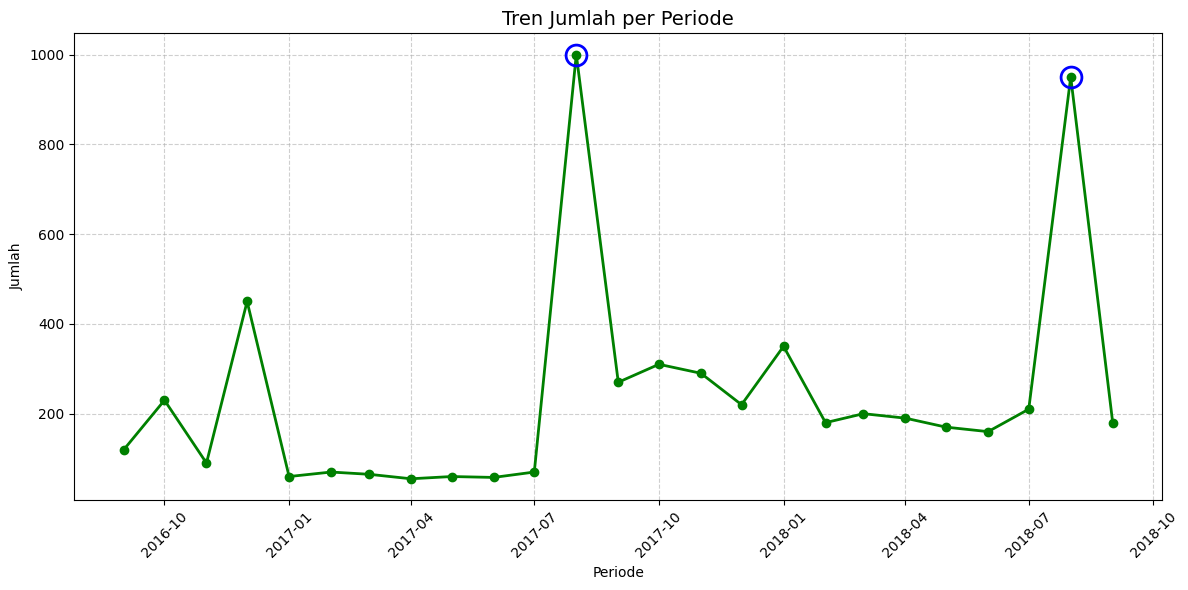

In [ ]:
#memanggil library
import matplotlib.pyplot as plt
import pandas as pd

#membuat contoh dataset sederhana
data = {
    'Periode': [
        '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707',
        '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806',
        '201807', '201808', '201809'
    ],
    'Jumlah': [
        120, 230, 90, 450, 60, 70, 65, 55, 60, 58, 70,
        1000, 270, 310, 290, 220, 350, 180, 200, 190, 170, 160,
        210, 950, 180
    ]
}

#merubah kedalam tabel dan menyesuaikan format
df = pd.DataFrame(data)
df['Periode'] = pd.to_datetime(df['Periode'], format='%Y%m')

#membuat grafik line chart
plt.figure(figsize = (12, 6))
plt.plot(df['Periode'], df['Jumlah'], marker = 'o', color = 'green', linewidth = 2)
spike_indices = [11, 23]
for i in spike_indices:
    plt.plot(df['Periode'][i], df['Jumlah'][i], 'o', markersize = 15,
             markerfacecolor = 'none', markeredgecolor = 'blue', markeredgewidth = 2)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.title('Tren Jumlah per Periode', fontsize = 14)
plt.xlabel('Periode')
plt.ylabel('Jumlah')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


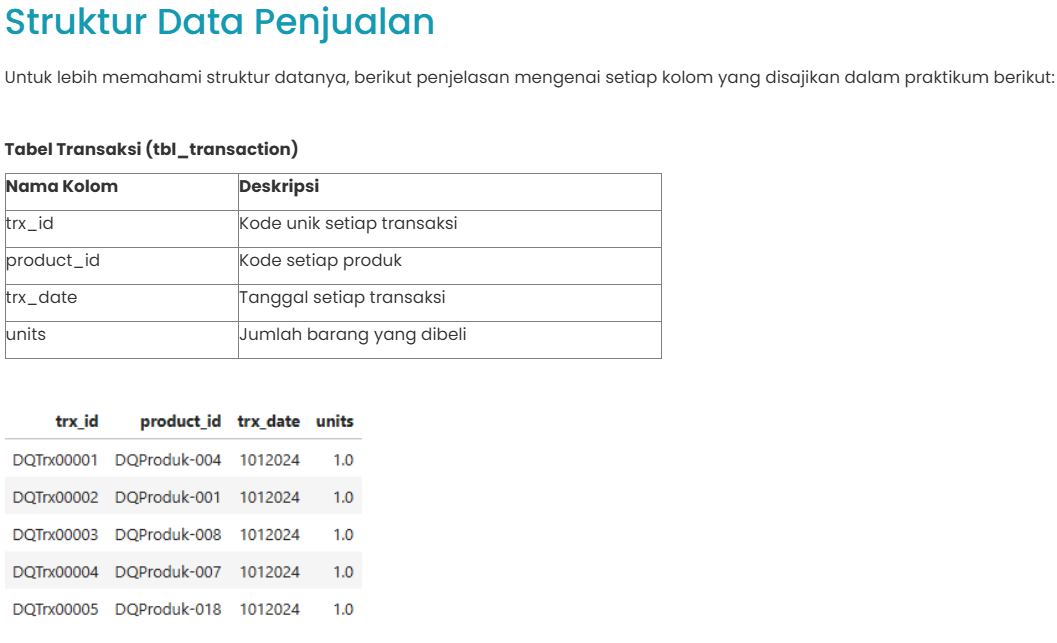

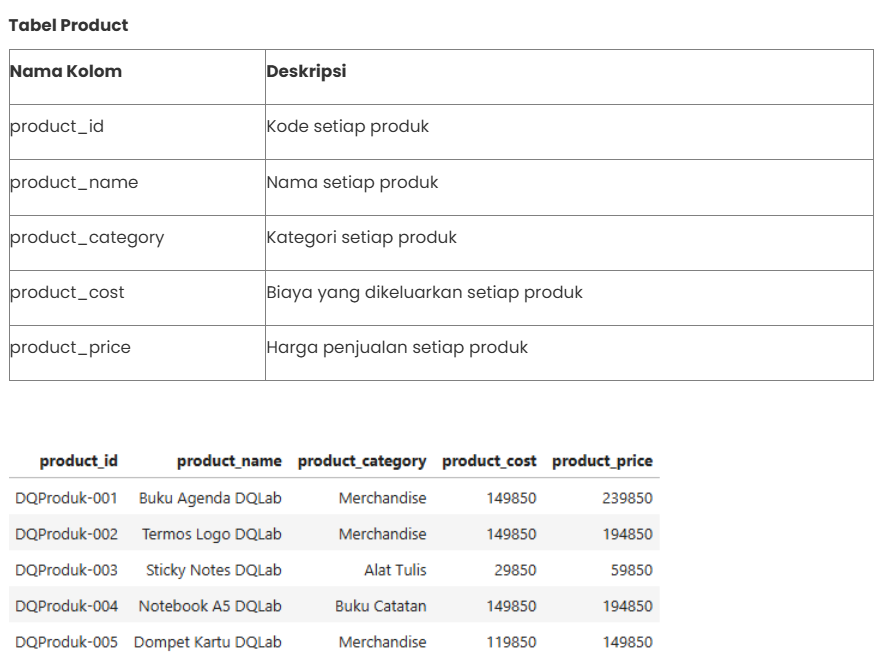

Menggabungkan Antar Dataset

In [ ]:
#membaca library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#membaca dataset dari file csv
df_transaction = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_transaction.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

#menggabungkan dua dataset
df_merged = pd.merge(df_transaction, df_product, on = 'product_id', how = 'left')

#mengurutkan dataset yang baru sesuai ketentuan
df_merged = df_merged[['trx_id', 'trx_date', 'product_id', 'product_name', 'product_category', 'product_cost', 'product_price', 'units']]

#menampilkan dataset
print(df_merged.head())

       trx_id  trx_date    product_id        product_name product_category  \
0  DQTrx00002   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   
1  DQTrx00014   1012024  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
2  DQTrx00034   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   
3  DQTrx00039   1012024  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
4  DQTrx00047   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   

   product_cost  product_price  units  
0        149850         239850    1.0  
1        149850         164850    1.0  
2        149850         239850    1.0  
3        149850         164850    1.0  
4        149850         239850    3.0  


Membersihkan Data dari Sel Kosong dan Duplikasi

In [ ]:
#merubah format trx_date menjadi tanggal
df_merged['trx_date'] = pd.to_datetime(df_merged['trx_date'].astype(str), format = '%d%m%Y', errors = 'coerce')

#merubah format units menjadi integer
df_merged['units'] = df_merged['units'].fillna(0).astype(int)

#menghapus nilai yang kosong
df_merged = df_merged.dropna()

#menghapus duplikasi
df_merged = df_merged.drop_duplicates()

#menampilkan dataset
print(df_merged.head())


       trx_id   trx_date    product_id        product_name product_category  \
0  DQTrx00002 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   
1  DQTrx00014 2024-01-10  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
2  DQTrx00034 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   
3  DQTrx00039 2024-01-10  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
4  DQTrx00047 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   

   product_cost  product_price  units  
0        149850         239850      1  
1        149850         164850      1  
2        149850         239850      1  
3        149850         164850      1  
4        149850         239850      3  


**Identifikasi Spike dan Rekomendasi**


Kelompokkan hasil penjualan berdasarkan bulan
Urutkan dari awal berdasarkan bulan transaksi dan nama produk
Ambil 5 produk terbanyak

Feature Engineering

Kelompokkan hasil penjualan berdasarkan bulan.
Urutkan dari awal berdasarkan bulan transaksi dan nama produk.
Ambil 5 produk terbanyak


In [ ]:
#membuat kolom periode (bulan)
df_merged['trx_month'] = df_merged['trx_date'].dt.to_period('M').dt.to_timestamp()

#membuat agregasi penjualan per produk per bulan
df_sales_summary = df_merged.groupby(['trx_month', 'product_id', 'product_name'])['units'].sum().reset_index()

#Hitung total units per produk (keseluruhan bulan)
top_products = df_sales_summary.groupby('product_name')['units'].sum().nlargest(5).index

#Filter df_sales_summary hanya untuk 10 produk terlaris
df_top_sales = df_sales_summary[df_sales_summary['product_name'].isin(top_products)].copy()

#menampilkan dataset
print(df_top_sales.head())


   trx_month    product_id        product_name  units
0 2024-01-01  DQProduk-001   Buku Agenda DQLab   3709
1 2024-01-01  DQProduk-003  Sticky Notes DQLab   1243
2 2024-01-01  DQProduk-009  Pulpen Metal DQLab   2882
3 2024-01-01  DQProduk-019  Kertas Warna DQLab     17
4 2024-02-01  DQProduk-001   Buku Agenda DQLab   3227


Identifikasi Spike

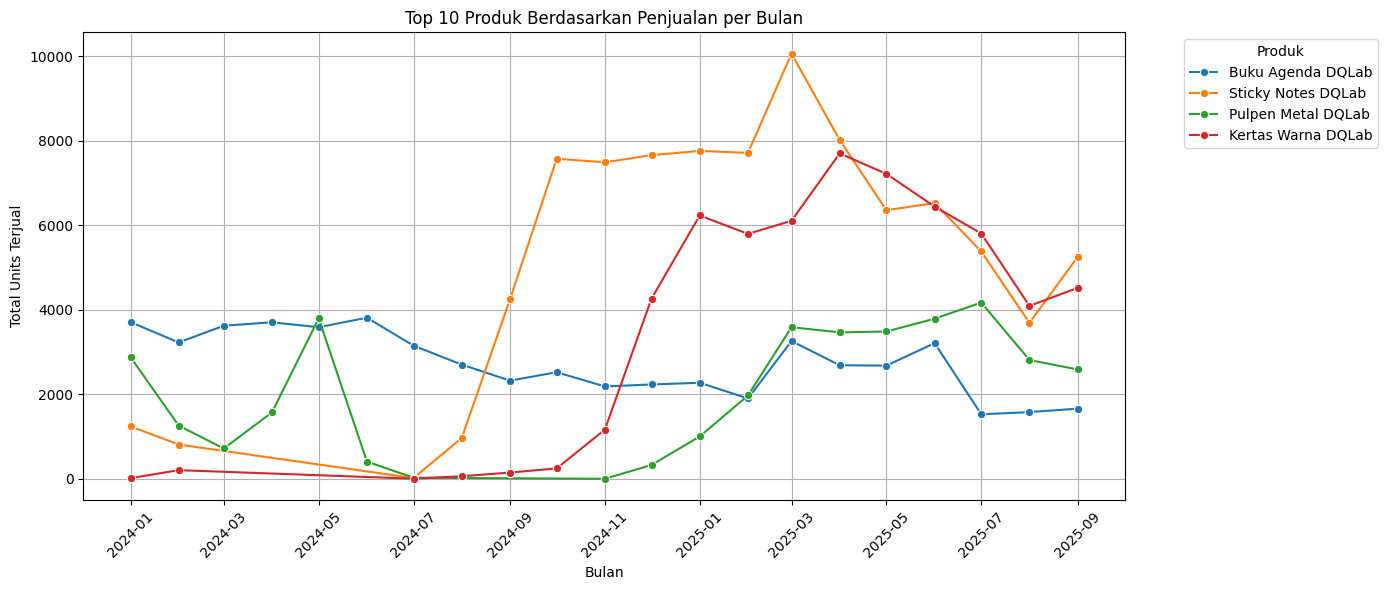

In [ ]:
#Visualisasikan Data
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_top_sales, x = 'trx_month', y = 'units', hue = 'product_name', marker = 'o')
plt.title('Top 10 Produk Berdasarkan Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Units Terjual')
plt.xticks(rotation = 45)
plt.legend(title = 'Produk', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.grid(True)
plt.show()